Name: **Nishit Dudeja**  
Email: `ndudeja_be21@thapar.edu`  
Roll No: **102283012**  
Group: **4CO26**  
Start Timestamp: 20240911-HHMM  

## Question

Consider the paper: <https://arxiv.org/abs/1804.03209>

  1. Read and summarise the paper in about 50 words.
  2. Download the dataset in the paper, statistically analyse and
     describe it, so that it may be useful for posterity. (Include code
     snippets in your .ipynb file to evidence your analysis.)
  3. Train a classifier so that you are able to distinguish the commands
     in the dataset.
  4. Report the performance results using standard benchmarks.
  5. Record about 30 samples of each command in your voice and create a
     new dataset (including a new user id for yourself).  You may use a
     timer on your computer to synchronise.
  6. Fine tune your classifier to perform on your voice.
  7. Report the results.


## Solution

##### PAPER SUMMARY
The paper introduces the Speech Commands dataset, created to aid the training and evaluation of keyword spotting systems. These systems are crucial for detecting specific spoken words (like "yes," "no," digits, and other commands) from a limited vocabulary. The paper explains that traditional speech recognition datasets focus on full-sentence transcription and are unsuitable for keyword spotting tasks, where smaller, on-device models are required. The Speech Commands dataset Version 1 contains 64,727 utterances from 1,881
speakers. The paper also describes the methodology used to ensure the dataset’s quality and consistency, including data preprocessing techniques like filtering out silent or too-quiet samples, manual review, and crowdsourced quality control.The paper also provides baseline results for models trained on the dataset, using metrics such as Top-One Error. On the version 1 of the dataset, the author has got the following results after training the default convolution model from the TensorFlow tutorial (based on Convolutional Neural Networks for Small-footprint Keyword spotting) using the V1 training data a TopOne score of 85.4%, when evaluated against the test set from V1.



##### DOWNLOADING THE DATASET AND EDA

> Add blockquote




In [1]:
!wget http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz


--2024-09-11 09:11:12--  http://download.tensorflow.org/data/speech_commands_v0.01.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 209.85.145.207, 142.250.125.207, 209.85.200.207, ...
Connecting to download.tensorflow.org (download.tensorflow.org)|209.85.145.207|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1489096277 (1.4G) [application/gzip]
Saving to: ‘speech_commands_v0.01.tar.gz.2’

speech_commands_v0. 100%[===================>]   1.39G  51.9MB/s    in 30s     

2024-09-11 09:11:42 (47.8 MB/s) - ‘speech_commands_v0.01.tar.gz.2’ saved [1489096277/1489096277]



In [ ]:
!tar -xvzf speech_commands_v0.01.tar.gz

In [3]:
!ls /content

_background_noise_  four     no		  sheila			  tree
bed		    go	     off	  six				  two
bird		    happy    on		  speech_commands_v0.01.tar.gz	  up
cat		    house    one	  speech_commands_v0.01.tar.gz.1  validation_list.txt
dog		    left     README.md	  speech_commands_v0.01.tar.gz.2  wow
down		    LICENSE  right	  stop				  yes
eight		    marvin   sample_data  testing_list.txt		  zero
five		    nine     seven	  three


In [4]:
import os
import numpy as np
import librosa

data_path = '/content'


durations = []
word_counts = {}


for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith('.wav'):
            file_path = os.path.join(root, file)
            audio, sr = librosa.load(file_path, sr=None)
            duration = librosa.get_duration(y=audio, sr=sr)
            durations.append(duration)

            word = root.split("/")[-1]
            if word not in word_counts:
                word_counts[word] = 0
            word_counts[word] += 1


mean_duration = np.mean(durations)
std_duration = np.std(durations)
total_samples = len(durations)


print(f"Mean duration of audio files: {mean_duration:.2f} seconds")
print(f"Standard deviation of durations: {std_duration:.2f} seconds")
print(f"Total number of samples: {total_samples}")
print("Word Frequencies:")
for word, count in word_counts.items():
    print(f"{word}: {count} samples")


Mean duration of audio files: 0.99 seconds
Standard deviation of durations: 0.65 seconds
Total number of samples: 64727
Word Frequencies:
right: 2367 samples
eight: 2352 samples
two: 2373 samples
on: 2367 samples
dog: 1746 samples
bed: 1713 samples
no: 2375 samples
nine: 2364 samples
cat: 1733 samples
one: 2370 samples
up: 2375 samples
five: 2357 samples
left: 2353 samples
marvin: 1746 samples
go: 2372 samples
tree: 1733 samples
off: 2357 samples
stop: 2380 samples
zero: 2376 samples
six: 2369 samples
down: 2359 samples
happy: 1742 samples
house: 1750 samples
three: 2356 samples
_background_noise_: 6 samples
sheila: 1734 samples
wow: 1745 samples
seven: 2377 samples
four: 2372 samples
yes: 2377 samples
bird: 1731 samples


In [5]:
!pip install librosa matplotlib seaborn

In [6]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


##### BAR GRAPH FOR VISUALISING NUMBER OF SAMPLES COMMAND

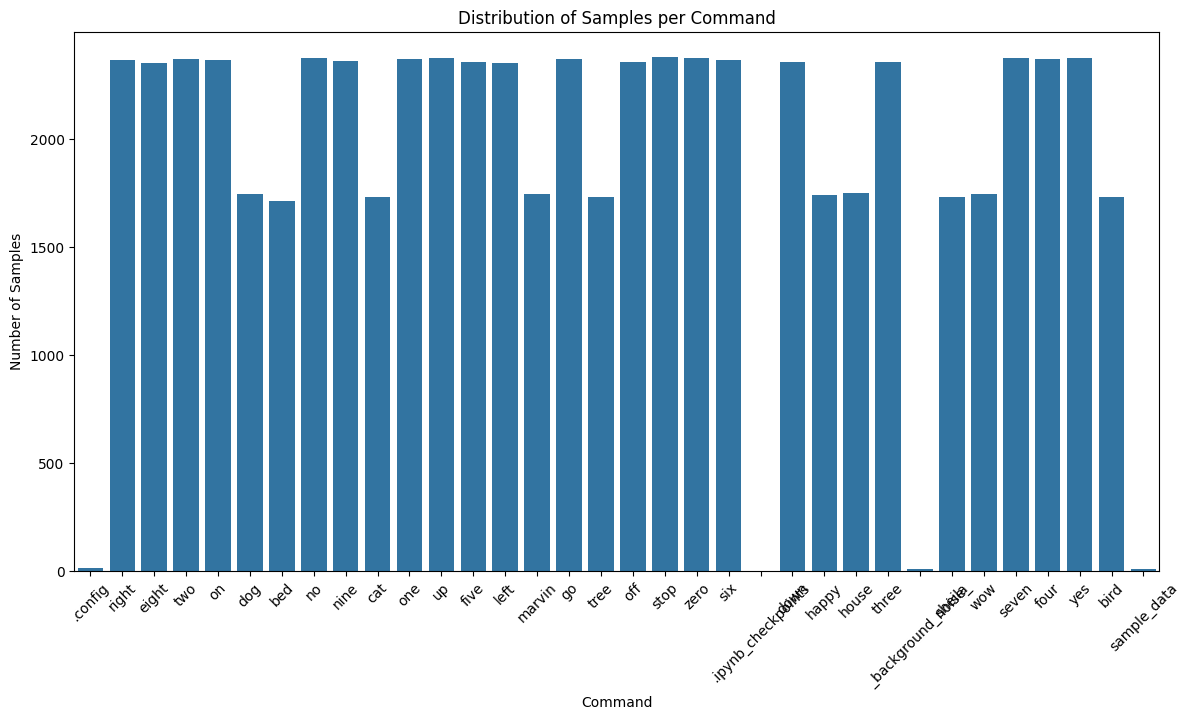

In [7]:

dataset_path = "/content"


commands = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d))]


sample_counts = {command: len(os.listdir(os.path.join(dataset_path, command))) for command in commands}


plt.figure(figsize=(14, 7))
sns.barplot(x=list(sample_counts.keys()), y=list(sample_counts.values()))
plt.xticks(rotation=45)
plt.title("Distribution of Samples per Command")
plt.ylabel("Number of Samples")
plt.xlabel("Command")
plt.show()


##### VISUALISATION ON AUDIO WAVEFORM

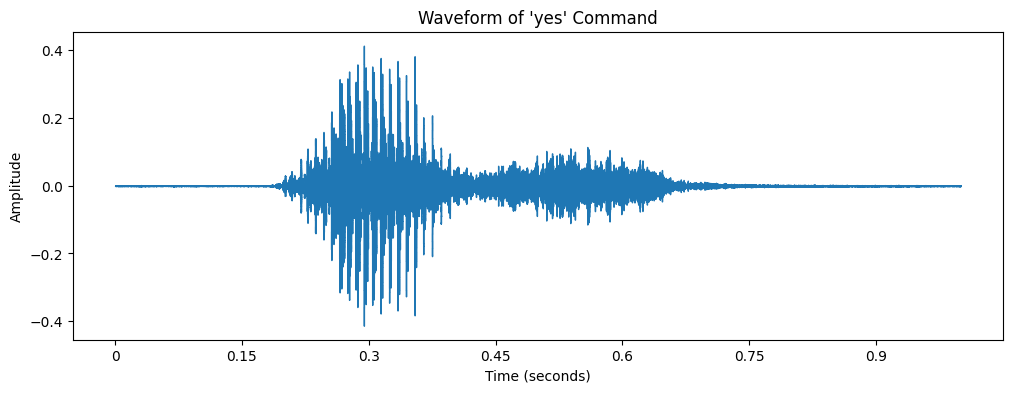

In [8]:

sample_file = os.path.join(dataset_path, "yes", os.listdir(os.path.join(dataset_path, "yes"))[0])
audio, sr = librosa.load(sample_file, sr=None)


plt.figure(figsize=(12, 4))
librosa.display.waveshow(audio, sr=sr)
plt.title(f"Waveform of 'yes' Command")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.show()


##### Visualize MFCCs (Mel-frequency cepstral coefficients)
MFCCs are commonly used features in speech and audio recognition tasks.

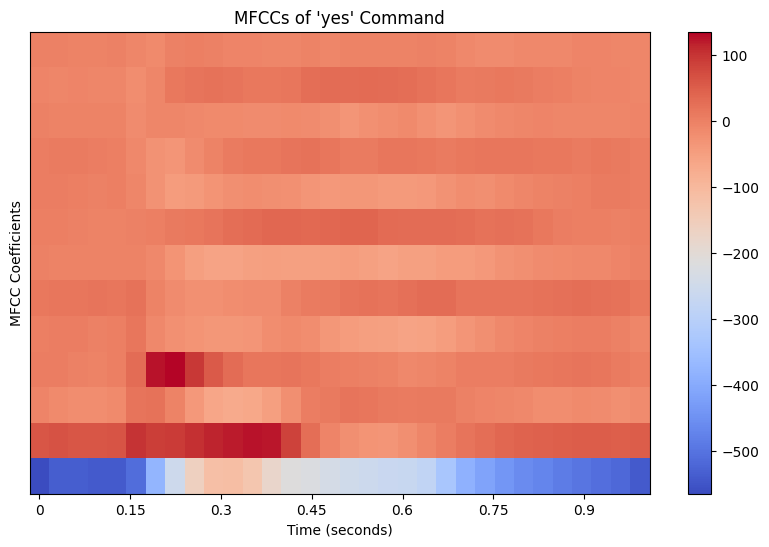

In [9]:

mfccs = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=13)


plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time', sr=sr)
plt.colorbar()
plt.title("MFCCs of 'yes' Command")
plt.xlabel("Time (seconds)")
plt.ylabel("MFCC Coefficients")
plt.show()


##### Visualize Spectrogram
A spectrogram shows the distribution of frequency content over time. This can be useful to understand the frequency domain representation of an audio signal.

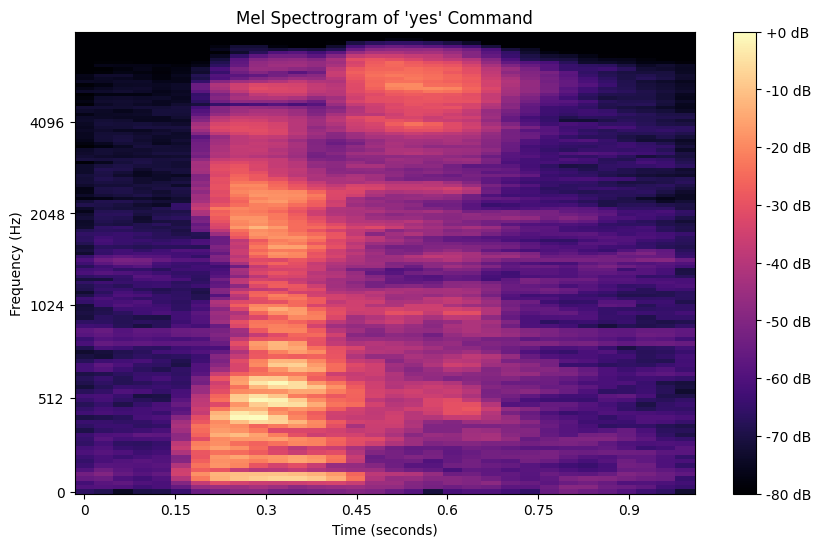

In [10]:

spectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_mels=128)

spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)


plt.figure(figsize=(10, 6))
librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title("Mel Spectrogram of 'yes' Command")
plt.xlabel("Time (seconds)")
plt.ylabel("Frequency (Hz)")
plt.show()


In [11]:
!pip install tensorflow

In [13]:
import os
import librosa
import numpy as np
import librosa.display


def load_data(data_path, target_words, sr=16000, duration=1, n_mfcc=13, max_pad_len=44):
    X = []
    y = []
    for idx, word in enumerate(target_words):
        word_path = os.path.join(data_path, word)
        for file in os.listdir(word_path):
            if file.endswith('.wav'):
                file_path = os.path.join(word_path, file)
                audio, sr = librosa.load(file_path, sr=sr, duration=duration)
                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)

                if mfcc.shape[1] < max_pad_len:
                    pad_width = max_pad_len - mfcc.shape[1]
                    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
                else:
                    mfcc = mfcc[:, :max_pad_len]

                X.append(mfcc)
                y.append(idx)


    return np.array(X), np.array(y)


target_words = ['bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'four', 'go', 'happy', 'house', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right','seven','sheila','six','stop','three','two','up','wow','yes','zero']
data_path = '/content'

X, y = load_data(data_path, target_words)


print(X.shape)



(62988, 13, 44)


##### CNN Classifier

In [15]:
import tensorflow as tf

from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import numpy as np
import os
import librosa
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = tf.keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(X.shape[1], X.shape[2], 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(target_words), activation='softmax')
])


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 38s 23ms/step - accuracy: 0.2980 - loss: 2.8206 - val_accuracy: 0.7483 - val_loss: 0.8450
Epoch 2/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 44s 25ms/step - accuracy: 0.7720 - loss: 0.7642 - val_accuracy: 0.7945 - val_loss: 0.7017
Epoch 3/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 36s 22ms/step - accuracy: 0.8355 - loss: 0.5468 - val_accuracy: 0.8492 - val_loss: 0.5114
Epoch 4/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 46s 26ms/step - accuracy: 0.8624 - loss: 0.4531 - val_accuracy: 0.8435 - val_loss: 0.5331
Epoch 5/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 35s 22ms/step - accuracy: 0.8867 - loss: 0.3807 - val_accuracy: 0.8546 - val_loss: 0.5058
Epoch 6/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.8970 - loss: 0.3346 - val_accuracy: 0.8602 - val_loss: 0.5013
Epoch 7/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 39s 22ms/step - accuracy: 0.9069 - loss: 0.2988 - val_accuracy: 0.8637 - val_loss: 0.5036
Epoch 8/10
1575/1575 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9154 -

394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
              precision    recall  f1-score   support

         bed       0.84      0.83      0.84       351
        bird       0.90      0.87      0.89       332
         cat       0.86      0.84      0.85       328
         dog       0.81      0.85      0.83       339
        down       0.78      0.82      0.80       485
       eight       0.92      0.88      0.90       464
        five       0.86      0.81      0.84       489
        four       0.81      0.94      0.87       471
          go       0.76      0.66      0.71       455
       happy       0.97      0.93      0.95       332
       house       0.96      0.94      0.95       358
        left       0.89      0.91      0.90       451
      marvin       0.95      0.83      0.89       349
        nine       0.87      0.87      0.87       495
          no       0.79      0.85      0.82       504
         off       0.84      0.80      0.82       481
          on       0.86      0.79      0

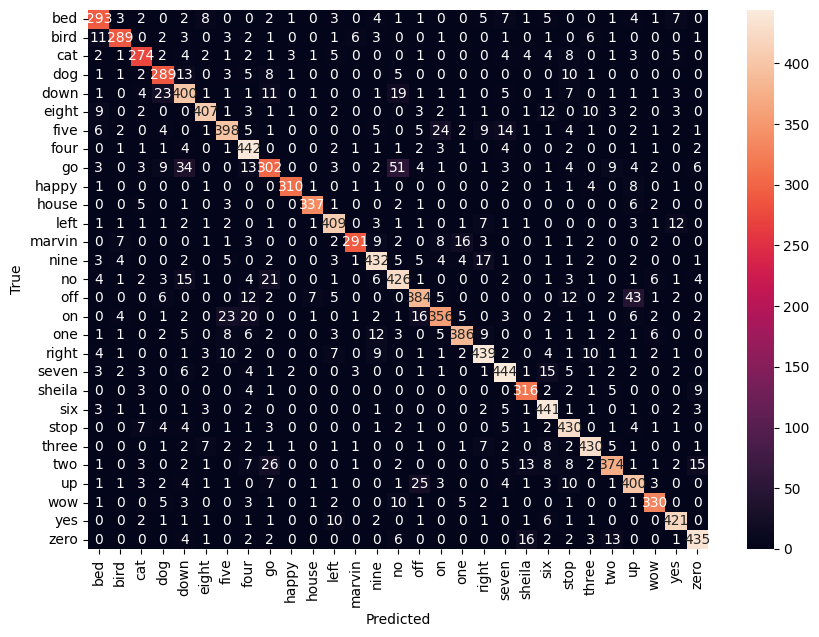

In [16]:
from sklearn.metrics import classification_report, confusion_matrix


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


print(classification_report(y_test, y_pred_classes, target_names=target_words))


import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=target_words, yticklabels=target_words)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [17]:

model.save('speech_nishit_dudeja_102283012.h5')


In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 11, 42, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 5, 21, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 3, 19, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 92,674 (362.01 KB)

 Trainable params: 73,856 (288.50 KB)

 Non-trainable params: 18,816 (73.50 KB)

 Optimizer params: 2 (12.00 B)

##### COLLECTING DATASET

SINCE COLAB DOES NOT SUPPORT MIC INPUT, I HAVE RUN THE FOLLOWING SCRIPT LOCALLY ON MY COMPUTER.

In [ ]:
!pip install sounddevice scipy

###### The error below is due to bottleneck of mic support in google colab, to solve this, i have saved the below script as 'collect.py' in a local instance and run it there.

In [ ]:
import sounddevice as sd
from scipy.io.wavfile import write
import os
import time


fs = 16000


duration = 1

num_samples = 30


commands = ['yes', 'no', 'up', 'down', 'left', 'right', 'stop', 'go', 'on', 'off']


user_id = 'nishit_dudeja'

output_dir = f'./{user_id}_voice_commands'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

def record_command(command, sample_num):
    print(f"Recording '{command}' - Sample {sample_num + 1}/{num_samples}")
    recording = sd.rec(int(duration * fs), samplerate=fs, channels=1)
    sd.wait()
    command_dir = os.path.join(output_dir, command)
    if not os.path.exists(command_dir):
        os.makedirs(command_dir)


    filename = f"{command}_{user_id}_{sample_num + 1}.wav"
    write(os.path.join(command_dir, filename), fs, recording)
    print(f"Saved {filename}")


for command in commands:
    for sample_num in range(num_samples):
        record_command(command, sample_num)
        time.sleep(1)


##### Terminal output of the above script stored as 'collect.py' in a local instance

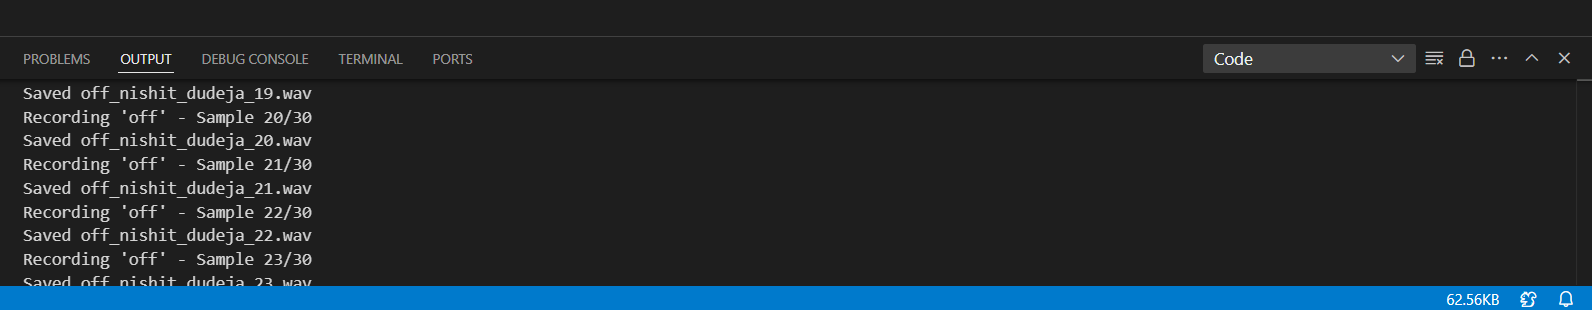

##### CNN Classifier fine tuning on our own dataset

In [64]:

!unzip /102283012_voice_commands.zip -d /102283012_voice_commands


Archive:  /102283012_voice_commands.zip
   creating: /102283012_voice_commands/nishit_dudeja_voice_commands/
   creating: /102283012_voice_commands/nishit_dudeja_voice_commands/down/
  inflating: /102283012_voice_commands/nishit_dudeja_voice_commands/down/down_nishit_dudeja_1.wav  
  inflating: /102283012_voice_commands/nishit_dudeja_voice_commands/down/down_nishit_dudeja_10.wav  
  inflating: /102283012_voice_commands/nishit_dudeja_voice_commands/down/down_nishit_dudeja_11.wav  
  inflating: /102283012_voice_commands/nishit_dudeja_voice_commands/down/down_nishit_dudeja_12.wav  
  inflating: /102283012_voice_commands/nishit_dudeja_voice_commands/down/down_nishit_dudeja_13.wav  
  inflating: /102283012_voice_commands/nishit_dudeja_voice_commands/down/down_nishit_dudeja_14.wav  
  inflating: /102283012_voice_commands/nishit_dudeja_voice_commands/down/down_nishit_dudeja_15.wav  
  inflating: /102283012_voice_commands/nishit_dudeja_voice_commands/down/down_nishit_dudeja_16.wav  
  inflatin

In [65]:
self_dataset_path = "/102283012_voice_commands/nishit_dudeja_voice_commands"

In [66]:


def load_data(data_path, target_words, sr=16000, duration=1, n_mfcc=13, max_pad_len=44):
    X = []
    y = []
    for idx, word in enumerate(target_words):
        word_path = os.path.join(data_path, word)
        for file in os.listdir(word_path):
            if file.endswith('.wav'):
                file_path = os.path.join(word_path, file)
                audio, sr = librosa.load(file_path, sr=sr, duration=duration)
                mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=n_mfcc)


                if mfcc.shape[1] < max_pad_len:
                    pad_width = max_pad_len - mfcc.shape[1]
                    mfcc = np.pad(mfcc, pad_width=((0, 0), (0, pad_width)), mode='constant')
                else:
                    mfcc = mfcc[:, :max_pad_len]

                X.append(mfcc)
                y.append(idx)


    return np.array(X), np.array(y)


target_words = ['yes', 'no', 'up', 'down', 'left', 'right', 'stop', 'go', 'on', 'off']



X, y = load_data(self_dataset_path, target_words)


print(X.shape)

(300, 13, 44)


In [67]:

X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [68]:

model = load_model('/content/speech_nishit_dudeja_102283012.h5')


In [69]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 11, 42, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 5, 21, 32)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 3, 19, 64)           │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 9, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 29)                  │           3,741 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 96,415 (376.62 KB)

 Trainable params: 96,413 (376.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [70]:

for layer in model.layers[:-2]:
    layer.trainable = False


In [71]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam


model = load_model('/content/speech_nishit_dudeja_102283012.h5')

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))



loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy after fine-tuning: {accuracy * 100:.2f}%")


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.0603 - loss: 11.0869 - val_accuracy: 0.1000 - val_loss: 3.2439
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2515 - loss: 2.7854 - val_accuracy: 0.2833 - val_loss: 2.2099
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4497 - loss: 1.8170 - val_accuracy: 0.6000 - val_loss: 1.3993
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7035 - loss: 1.0674 - val_accuracy: 0.7000 - val_loss: 0.9376
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8029 - loss: 0.6925 - val_accuracy: 0.8333 - val_loss: 0.6576
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9120 - loss: 0.3724 - val_accuracy: 0.8167 - val_loss: 0.5215
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9598 - loss: 0.2037 - val_accuracy: 0.8833 - val_loss: 0.4116
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9822 - loss: 0.0962 - val_accuracy: 0.9000 - val_loss: 0.3461

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step 
              precision    recall  f1-score   support

         yes       1.00      0.83      0.91         6
          no       1.00      1.00      1.00         5
          up       1.00      1.00      1.00         7
        down       1.00      1.00      1.00         9
        left       0.67      1.00      0.80         2
       right       1.00      1.00      1.00         5
        stop       1.00      1.00      1.00         5
          go       1.00      0.75      0.86        12
          on       1.00      1.00      1.00         3
         off       0.67      1.00      0.80         6

    accuracy                           0.93        60
   macro avg       0.93      0.96      0.94        60
weighted avg       0.96      0.93      0.94        60



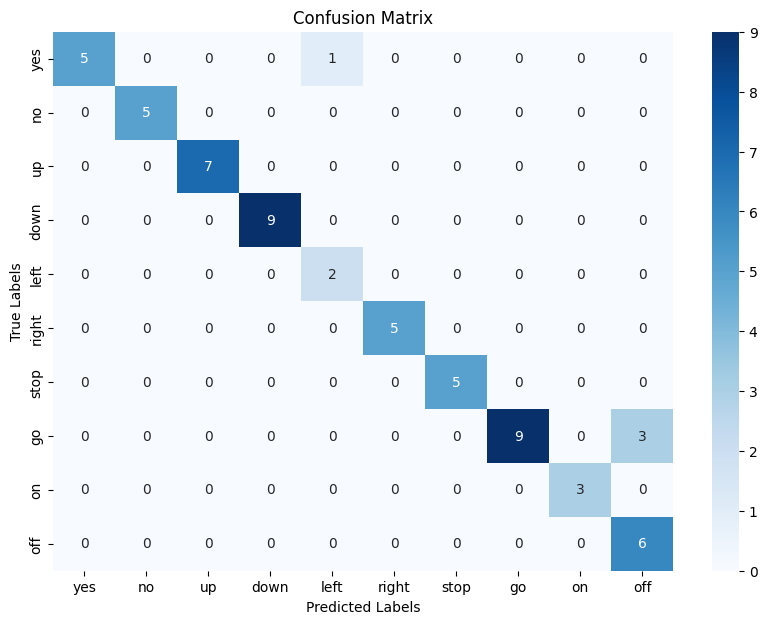

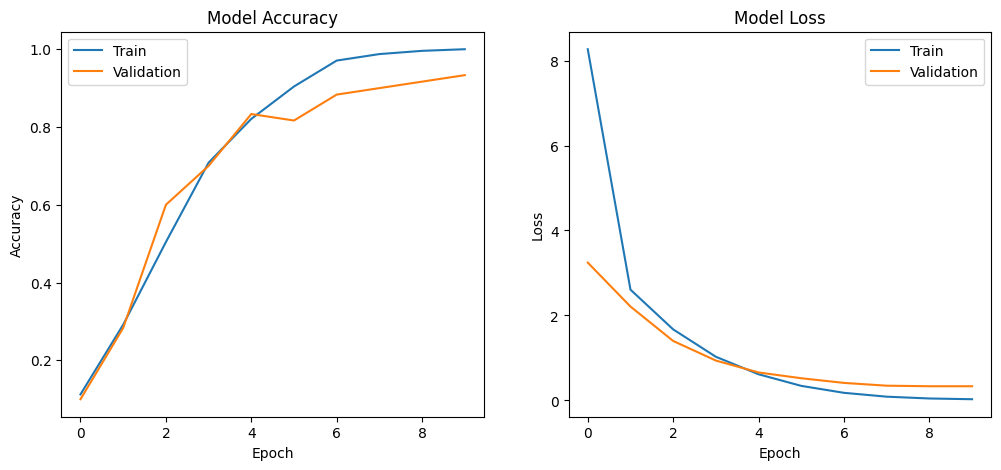

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9451 - loss: 0.2720
Test Accuracy after fine-tuning: 93.33%


In [73]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)


target_names = ['yes', 'no', 'up', 'down', 'left', 'right', 'stop', 'go', 'on', 'off']
print(classification_report(y_test, y_pred_classes, target_names=target_names))


conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])


plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()


loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy after fine-tuning: {accuracy * 100:.2f}%")
